# <font color='blue'>Introduction</font>

## <font color='green'>Foreword</font>

Christopher Denq

5/5/2023

Notebook 2 of 3

Contains the cleaning & EDA functions that are used to prep and investigate the data used for NLP

## <font color='green'>Problem Statement</font>

In the competitive and dynamic world of big data, data science teams are eager to leverage the internet's free data for insight.

This project aims to "pre-train" several NLP classification models and then provide an executive summary of the results to an existing data science client. This data science team is looking to accurately differentiate between two specific subreddits (AskReddit, AskScience) as a first step in developing targetted ads/recommendations.

Success of these pre-trained models will be based on balanced accuracy score because a "false positive" is not anymore problematic than a "false negative" in this business context. The scope of the project is limited to the data scrapped within 3 weeks on said subreddits. The model choices were limited by local compute power. The executive summary provides "future considerations" for the existing data science client, including mentions between score choice, model choice, and scope choice.

## <font color='green'>Code Setup</font>

### Imports and Settings

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Note, I suppress this future warning because Pandas is throwing a false positive. I've indicated where this warning was in the notebook below.
pd.set_option('mode.chained_assignment', None)

### Loading Dataset & Global Variables

In [43]:
# import askreddit
df_1 = pd.read_csv("../scrapped_data/askreddit_data.csv")
print(df_1.shape)

# import askscience
df_2 = pd.read_csv("../scrapped_data/askscience_data.csv")
print(df_2.shape)

(13149, 6)
(12314, 6)


### Global Custom Functions

In [44]:
# replacement for .head()
def peek(df: pd.DataFrame) -> None:
    """ 
    Print the top and bottom 3 values in a df.

    Parameters:
        df: pd.DataFrame
            The df to peek on

    Returns:
        None
    """ 
    print(df.iloc[np.r_[0:3, -3:0]])
    return

# <font color='blue'>Data Wrangling</font>

## <font color='green'>Selection</font>

### Merging Necessary Data

In [45]:
# combining both dfs into 1
df_raw = pd.concat([df_1,df_2])
print(df_raw.shape)
peek(df_raw)

(25463, 6)
        subreddit   selftext  \
0       AskReddit        NaN   
1       AskReddit        NaN   
2       AskReddit        NaN   
12311  askscience  [removed]   
12312  askscience  [removed]   
12313  askscience  [removed]   

                                                   title author_flair_text  \
0             What’s the sluttiest thing a man can wear?               NaN   
1      If my daughter wants to become a content creat...               NaN   
2      Women's of reddit, why do you care about Zodia...               NaN   
12311    Why do we hear sounds that aren't really there?               NaN   
12312  At what point in time could the average person...               NaN   
12313  Is it safe to drink very diluited strong acid ...               NaN   

       created_utc                                                url  
0       1682350935  https://www.reddit.com/r/AskReddit/comments/12...  
1       1682350937  https://www.reddit.com/r/AskReddit/comments/12...  
2

### Removing Unnecessary Data

In [46]:
# cutting out only to data used
df = df_raw[["title", "subreddit"]]
print(df_raw.shape)
peek(df)

(25463, 6)
                                                   title   subreddit
0             What’s the sluttiest thing a man can wear?   AskReddit
1      If my daughter wants to become a content creat...   AskReddit
2      Women's of reddit, why do you care about Zodia...   AskReddit
12311    Why do we hear sounds that aren't really there?  askscience
12312  At what point in time could the average person...  askscience
12313  Is it safe to drink very diluited strong acid ...  askscience


## <font color='green'>Cleaning</font>

### Handling Formatting/Typos/Translations

In [47]:
# reset index
df.reset_index(drop=True, inplace=True)

# lowercase all text
df.loc[:, "subreddit"] = df.loc[:, "subreddit"].map(lambda x: x.lower())
df.loc[:, "title"] = df.loc[:, "title"].map(lambda x: x.lower())
""" NOTE: the Pandas warning is located here.
The issue that Pandas thinks I'm having is that I'm not properly differentiating between a view and a copy, but I believe I am.
The recommended advice was to either use .loc (gives view) or .copy (gives copy) to explicitly tell Pandas which I'm using
As you can see from the code, I'm using .loc
Unrelated, df.loc chained with a .map always returns a copy (.apply/.map are not inplace)
But that doesn't matter, because I'm still making a change to a .loc by pointing it to a .copy
Thus, the warning should not activate
The code runs without error regardless, but I believe Pandas is throwing a false positive.
Would love feedback on this part because I've spent waaaay too much time Googling this and it was annoying me a lot too
"""

# remove all punctuation
punctuation = ["?", "‘", "’", "'", ",", ".", "“", '"', "”", "[", "]", "(", ")", "/"]
for mark in punctuation:
    df.loc[:, "title"] = df.loc[:, "title"].str.replace(mark, "", regex=True)
# note, we will need to remove other icons like emojis, but we will do that in the modeling section

# check values
peek(df)

                                                   title   subreddit
0               whats the sluttiest thing a man can wear   askreddit
1      if my daughter wants to become a content creat...   askreddit
2      womens of reddit why do you care about zodiac ...   askreddit
25460      why do we hear sounds that arent really there  askscience
25461  at what point in time could the average person...  askscience
25462  is it safe to drink very diluited strong acid ...  askscience


### Handling Nulls/Duplicates

In [48]:
# dropping duplicate reddit posts
df = df.drop_duplicates(subset="title")
print(df.shape)

(24712, 2)


### Handling Data Types

In [49]:
# correct data types, no cleaning here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24712 entries, 0 to 25462
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      24712 non-null  object
 1   subreddit  24712 non-null  object
dtypes: object(2)
memory usage: 579.2+ KB


## <font color='green'>Finalizing</font>

### Save Cleaned DataFrame

In [50]:
df.to_csv("../scrapped_data/clean_ask_data.csv", index=False)

# <font color='blue'>EDA</font>

### Distribution of Title Lengths

In [51]:
# calculating that data and putting into
df["char_count"] = df.loc[:, "title"].map(lambda x: len(x))
df["word_count"] = df.loc[:, "title"].map(lambda x: len(x.split(" ")))
peek(df)

                                                   title   subreddit  \
0               whats the sluttiest thing a man can wear   askreddit   
1      if my daughter wants to become a content creat...   askreddit   
2      womens of reddit why do you care about zodiac ...   askreddit   
25460      why do we hear sounds that arent really there  askscience   
25461  at what point in time could the average person...  askscience   
25462  is it safe to drink very diluited strong acid ...  askscience   

       char_count  word_count  
0              40           8  
1              68          15  
2              51          10  
25460          45           9  
25461         130          21  
25462          55          10  


In [52]:
# checking the first and last 5 posts by word_count of both subrredits
df.loc[df["subreddit"] == "askreddit"].sort_values(by="word_count").reset_index().iloc[np.r_[0:5, -5:0]]

,index,title,subreddit,char_count,word_count
0,12568,https:ppkksveruinvitei=3211,askreddit,27,1
1,9275,https:wwwatlasautoconzcar-wreckersbay-of-plent...,askreddit,55,1
2,5722,boredneedgoodfootmassage,askreddit,24,1
3,5442,innokint22pro,askreddit,13,1
4,2359,vanilla parfymes,askreddit,16,2
12903,5263,how long did it take you have been a smoker fo...,askreddit,270,63
12904,6683,im a man who likes kilts and even skirts if yo...,askreddit,289,64
12905,8310,should i say it a few months ago i found out t...,askreddit,292,65
12906,3967,how can i make my man happier im a 38f and hes...,askreddit,289,67
12907,12756,am i gay i dont i think i just love big giant ...,askreddit,291,68


In [53]:
df.loc[df["subreddit"] == "askscience"].sort_values(by="word_count").reset_index().iloc[np.r_[0:5, -5:0]]

,index,title,subreddit,char_count,word_count
0,15824,electromagnetism,askscience,16,1
1,18967,jejrjdjdbrbfnsnshehrhr,askscience,22,1
2,21026,gueoemdñdmdnodmeoem,askscience,19,1
3,21805,https:shortestlinkmyvg,askscience,22,1
4,17740,探討應援經濟對於偶像團體的成員、公司以及產業的影響，如何促進偶像團體的發展以及行銷手段的多樣化,askscience,47,1
11799,17194,theory of relativity has a assumption that the...,askscience,294,62
11800,24870,i built a deck for a friend its 12 ft east to ...,askscience,281,63
11801,24533,lets say earth has a metal ring wrapped around...,askscience,285,63
11802,23253,ye dats wat al da homies talk bout mane neva l...,askscience,274,63
11803,16825,my friend killed his girlfriend and her father...,askscience,293,65


From this EDA exploration, I realized that Reddit posts that are obvious "garbage posts" can be easily identified with word_count.

"Garbage posts" are...
- spam posts (title is just some random URL or gibberish, which is all one word)
- low-effort posts (title is just one word, eg. "basketball???")
- certain non-english posts (title is in Chinese letters, which don't get parsed in formatting and so show up as 1 word)

While these garbage posts CAN potentially be useful in predicting a subreddit (for eg. maybe AskReddit is actually notorious for one-word low-effort posts), I don't want to base my NLP project on this because I consider these types of posts as "meta-content" / beyond the actual textual data within each post. It's both more challenging and fun to perform my NLP project on identifying key n-grams or sentiments for my prediction.

Thus, I will be performing more EDA here.

NOTE: I define "low-effort posts" as up to 1-gram posts (eg. "basketball??"). I had to draw the line somewhere and the slipperly slope was easiest at just the 1-grams. I also think the shortest grammatically sensible question will be 2-words long (eg. "whats basketball" after punctuation is removed).

In a future NLP project, I would probably expand out this logic to remove all low-effort posts.

In [54]:
# dropping non-1-word count posts
df = df[df["word_count"] != 1]
print(df.shape)

# saving newly cleaned df
df.to_csv("../scrapped_data/clean_ask_data.csv")

(24697, 4)


In [55]:
df.loc[df["subreddit"] == "askreddit"].sort_values(by="word_count").reset_index().iloc[np.r_[0:5, -5:0]]

,index,title,subreddit,char_count,word_count
0,12494,favorite munchies,askreddit,17,2
1,11128,hospital horrors,askreddit,16,2
2,1933,what screams,askreddit,12,2
3,1972,best nicknames,askreddit,14,2
4,9997,stockmarket advice,askreddit,18,2
12899,147,as you see in my writing i am not 100% good at...,askreddit,285,63
12900,6683,im a man who likes kilts and even skirts if yo...,askreddit,289,64
12901,8310,should i say it a few months ago i found out t...,askreddit,292,65
12902,3967,how can i make my man happier im a 38f and hes...,askreddit,289,67
12903,12756,am i gay i dont i think i just love big giant ...,askreddit,291,68


In [56]:
df.loc[df["subreddit"] == "askscience"].sort_values(by="word_count").reset_index().iloc[np.r_[0:5, -5:0]]

,index,title,subreddit,char_count,word_count
0,15627,hypothetical question,askscience,21,2
1,20837,atomic thunderstorm,askscience,19,2
2,23914,decommissioning reactors,askscience,24,2
3,22128,environmental odors,askscience,19,2
4,13758,benzene nomenclature,askscience,20,2
11788,15211,sometimes i hear ppl talking laughing or just ...,askscience,295,62
11789,23253,ye dats wat al da homies talk bout mane neva l...,askscience,274,63
11790,24870,i built a deck for a friend its 12 ft east to ...,askscience,281,63
11791,24533,lets say earth has a metal ring wrapped around...,askscience,285,63
11792,16825,my friend killed his girlfriend and her father...,askscience,293,65


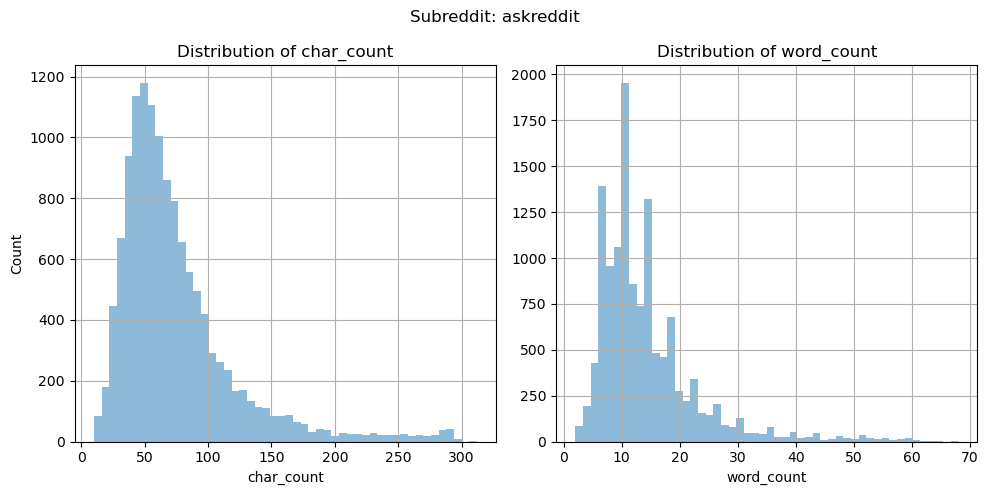

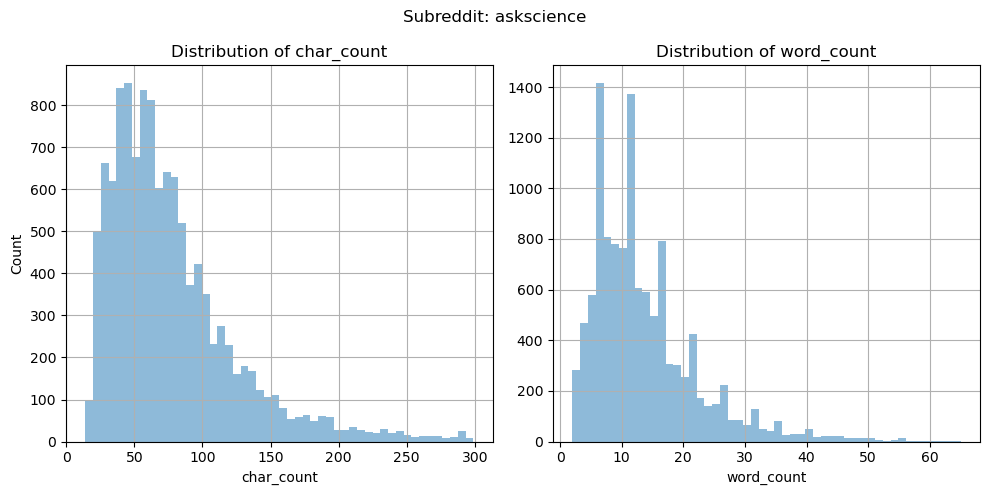

In [57]:
# graphing distribution
plot_cols = ["char_count", "word_count"]
subreddits = ["askreddit", "askscience"]
for i in range(2):
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle(f"Subreddit: {subreddits[i]}")
    ax[0].set_ylabel("Count")
    for j in range(len(plot_cols)):
        ax[j].set_title(f"Distribution of {plot_cols[j]}")
        ax[j].grid(visible=True)
        ax[j].set_xlabel(f"{plot_cols[j]}")
        ax[j].hist(df.loc[df["subreddit"] == subreddits[i], plot_cols[j]], bins=50, alpha=0.5)
    plt.tight_layout()
    plt.savefig(f"../images/distribution_{subreddits[i]}.png")
    plt.show()

The graphs above show that for each subreddit on each modality (char_count, word_count), their distributions are heavily skewed to the right. This means that the data is non-normal, which further meanns parametric ML models might struggle to classify these.

### Frequency of N-grams

In [58]:
# custom function for graphing top n words
def top_k_n_grams(k: int, 
                  subreddit: str,
                  n_gram: int,
                  stop_words: set=ENGLISH_STOP_WORDS) -> None:
    """ 
    Graphs and saves the top k n-grams for the provided subreddit as a png.

    Parameters:
        k: int
            The number of top n-grams to be graphed
        
        subreddit: str
            The subreddit to graph on

        n_gram: int
            The n-gram to graph on

        stop_words: set
            The set of stop_words to use in the CountVectorizer()
        
    Returns:
        None
            Plots and saves the specified graph
    """
    # vectorizing
    X = df.loc[df["subreddit"] == subreddit, "title"]
    cvec = CountVectorizer(stop_words=stop_words, ngram_range=(n_gram,n_gram))
    X_cvec_dense = cvec.fit_transform(X).todense()
    X_cvec_df = pd.DataFrame(X_cvec_dense, columns=cvec.get_feature_names_out())

    # graphing
    graph_data = X_cvec_df.sum().sort_values(ascending=False).head(k)
    plt.title(f"Top {k} Most Common {n_gram}-Grams in {subreddit}")
    plt.xlabel("Tokens")
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.grid(True)
    plt.barh(graph_data.index[::-1], graph_data.values[::-1], alpha=0.5)

    # saving
    plt.tight_layout()
    plt.savefig(f"../images/most_common_{n_gram}_grams_{subreddit}.png")
    plt.show()
    return

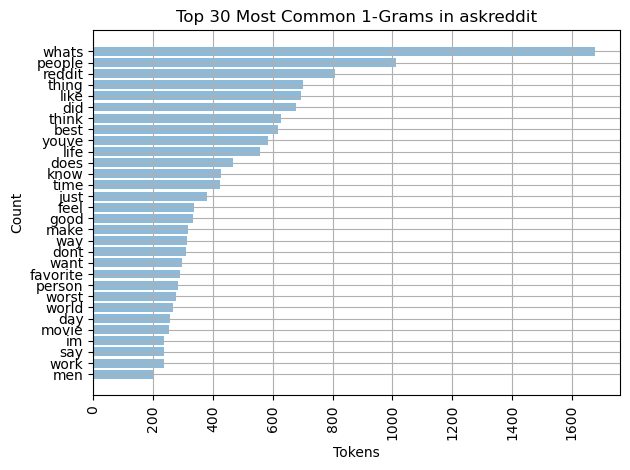

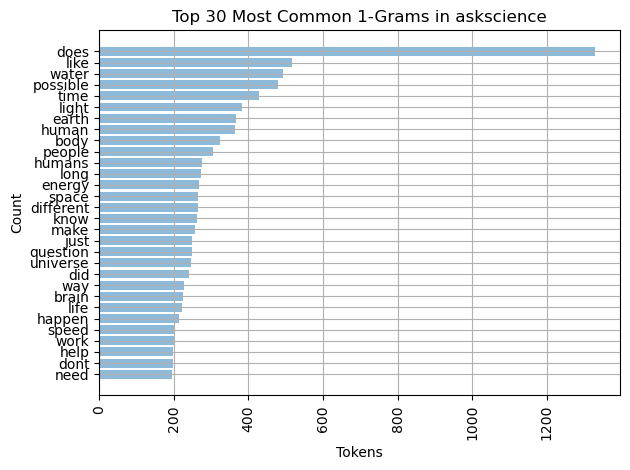

In [59]:
# graphing 1-gram for each subreddit
for subreddit in subreddits:
    top_k_n_grams(30, subreddit, 1)

From this EDA exploration, I realized that these Reddit posts actually have many stop words not in the standard stop words section.

Words such as "does", "what" etc. have a type of stop-word status.

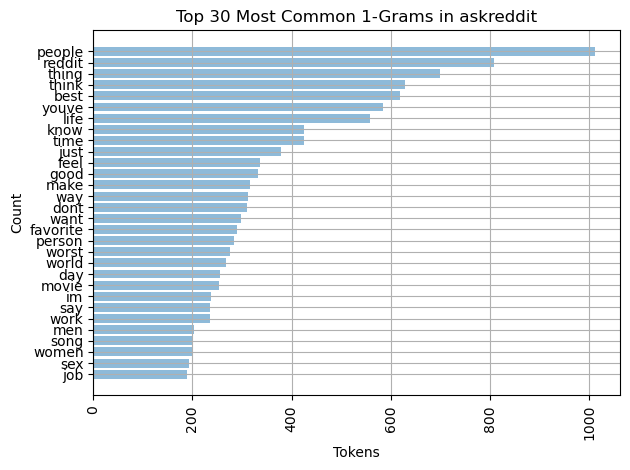

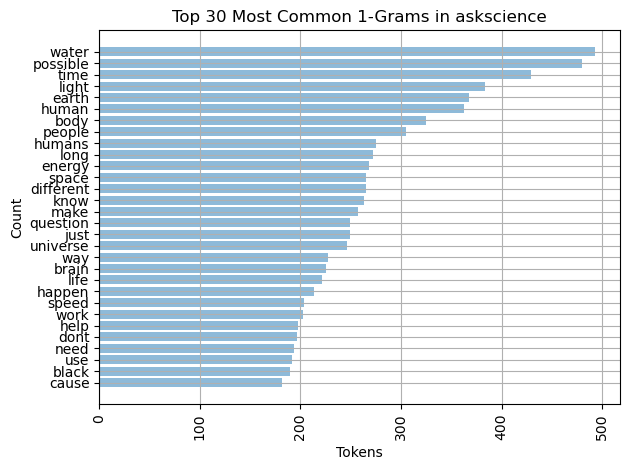

In [60]:
# creating custom stopwords
custom_words = ["what", "does", "how", "which", "whats", "did", "why", "where", "who", "when", "like"]
stop_words = ENGLISH_STOP_WORDS.union(custom_words)
for subreddit in subreddits:
    top_k_n_grams(30, subreddit, 1, stop_words)

Upon a rerun, we see much more distinct words that give away the subreddit. We'll move onto checking 2,3,4-grams.

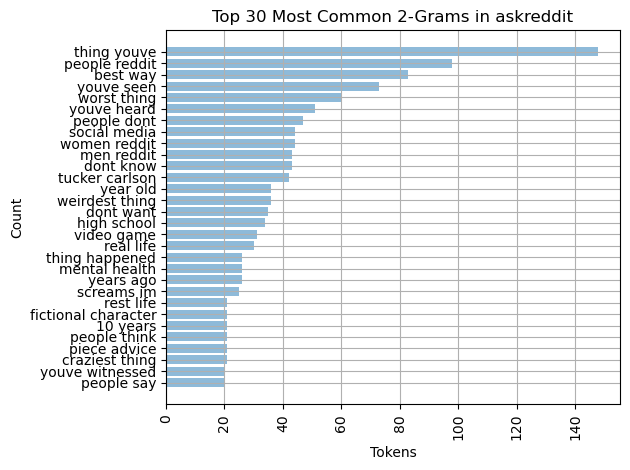

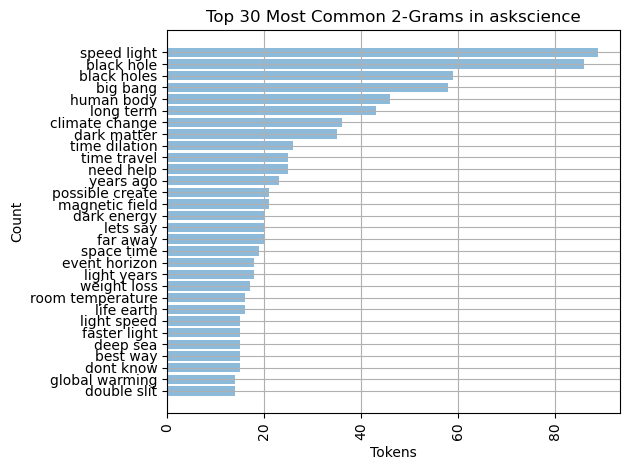

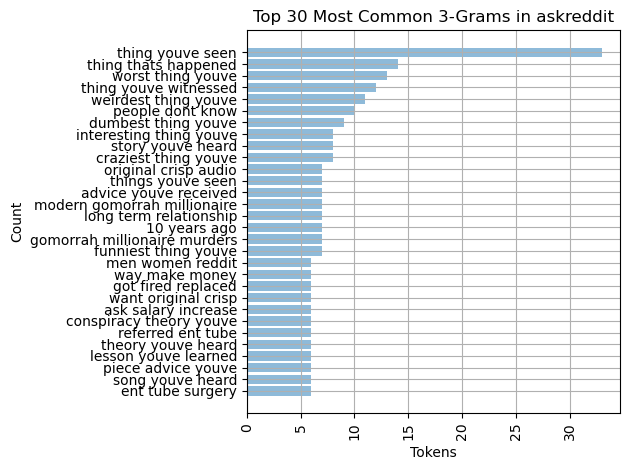

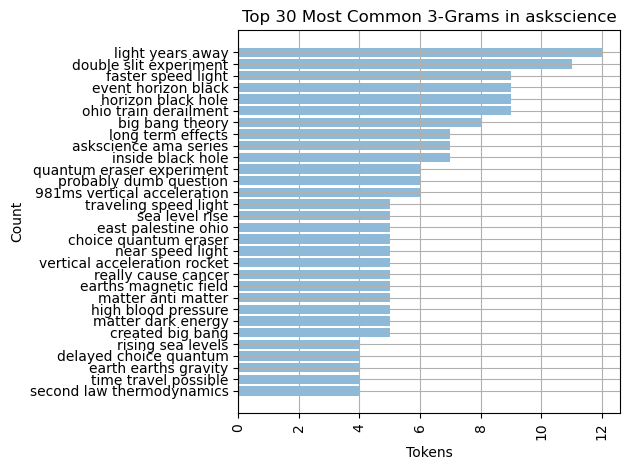

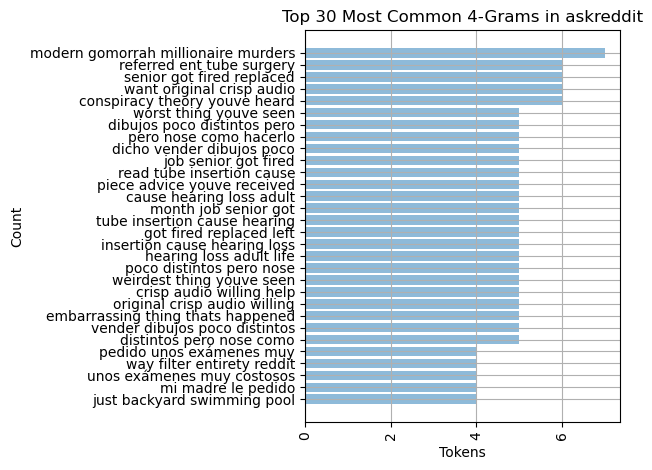

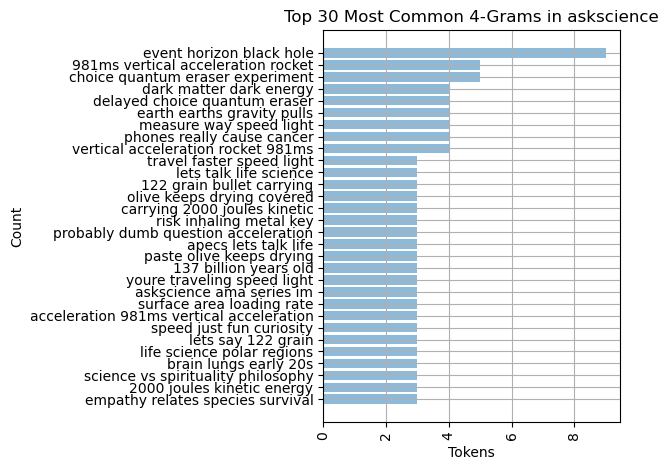

In [61]:
# graphing 2 to 4-grams for each subreddit
for i in range(2,5):
    for subreddit in subreddits:
        top_k_n_grams(30, subreddit, i, stop_words)

# <font color='blue'>Conclusion</font>

Overall, the cleaning and EDA process has given insights into what sort of models will be most useful to implement. Specifically, we know the data is not normal, so things like logistic regression might struggle because it relies on normality. Additionally, we know the shape of the df, which means the high dimensionality poses problems for KNN. 

In terms of graphs, it seems like 3-grams are the most telling between the subreddits. Askreddit seems to be more experiential questions ("what have you seen/done") while askscience seems to be about space, light, stars, black holes, etc. There are some "obvious" posts that are different, but the challenge will be trying to predict posts that don't have the obvious "space question" or "experiential question"! 